# Univariate Modelling

In [1]:
import os
import joblib
import pandas as pd

stored_models = [file for file in os.listdir() if file.endswith('.model.pkl')]
stored_models

['XGBRegressor.model.pkl',
 'BaggingRegressor.model.pkl',
 'ExtraTreeRegressor.model.pkl']

In [2]:
from sklearn.ensemble import VotingRegressor

estimators = []
for model_file in stored_models:
    print(f'Loading {model_file}')
    model = joblib.load(model_file)
    estimators.append((
        model_file.replace('.model.pkl', ''),
        model
    ))

estimators

Loading XGBRegressor.model.pkl
Loading BaggingRegressor.model.pkl
Loading ExtraTreeRegressor.model.pkl


[('XGBRegressor',
  XGBRegressor(alpha=1e-10, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=0.2552996708014773,
               learning_rate=0.019837870344990804, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=231, n_jobs=None, ...)),
 ('BaggingRegressor',
  BaggingRegressor(estimator=DecisionTreeRegressor(),
                   max_features=0.9971834473302514,
                   max_samples=0.5015366892800169, n_estimators=100)),
 ('ExtraTr

In [3]:
# Load, preprocess and standardize the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

ensemble = VotingRegressor(estimators=estimators, verbose=True)
ensemble.fit(X=X_train, y=y_train)
ensemble.score(X=X_train, y=y_train)

[Voting] ............. (1 of 3) Processing XGBRegressor, total=   1.3s
[Voting] ......... (2 of 3) Processing BaggingRegressor, total= 3.5min
[Voting] ....... (3 of 3) Processing ExtraTreeRegressor, total=   1.5s


0.691057419311941

# Prepare test results

In [4]:
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')

In [5]:
## Load the test data
test_data = pd.read_csv(test_file, index_col=0)
test_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from pipelines import pipeline

test_data = pipeline.fit_transform(test_data)
test_data.head()

,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,1.487404,1.319484,1.144505,0.950042,0.758339,0.564448,0.478097,0.394013,0.310512,0.226359,...,-0.352308,-0.358738,-0.353047,-0.333006,-0.152889,0,0,1,0,0
p01_8460,-1.474986,-1.416664,-1.353949,-1.288524,-1.094499,-0.899633,-0.701597,-0.712801,-0.719327,-0.726283,...,1.424785,2.375020,3.405125,2.541327,3.622585,0,0,0,0,1
p01_8461,-1.167471,-0.994927,-0.819300,-0.641599,-0.487180,-0.332560,-0.177288,-0.156820,-0.133783,-0.111675,...,-0.048902,-0.100583,0.110329,1.838452,0.434120,0,0,0,0,0
p01_8462,-0.706200,-0.593762,-0.480004,-0.364345,-0.332777,-0.301628,-0.269813,-0.198004,-0.123510,-0.050215,...,-0.337362,-0.358738,-0.353047,-0.333006,-0.333287,0,0,0,1,0
p01_8463,-1.659495,-1.653249,-1.641837,-1.627390,-1.650350,-1.672915,-1.688531,-1.639436,-1.582235,-1.525272,...,-0.352308,-0.358738,-0.353047,-0.347619,-0.333287,0,0,0,1,0


In [7]:
# Predict the bg+1:00 values
test_data['bg+1:00'] = ensemble.predict(test_data)
test_data.head()

,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,...,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,1.487404,1.319484,1.144505,0.950042,0.758339,0.564448,0.478097,0.394013,0.310512,0.226359,...,-0.358738,-0.353047,-0.333006,-0.152889,0,0,1,0,0,8.675116
p01_8460,-1.474986,-1.416664,-1.353949,-1.288524,-1.094499,-0.899633,-0.701597,-0.712801,-0.719327,-0.726283,...,2.375020,3.405125,2.541327,3.622585,0,0,0,0,1,6.516505
p01_8461,-1.167471,-0.994927,-0.819300,-0.641599,-0.487180,-0.332560,-0.177288,-0.156820,-0.133783,-0.111675,...,-0.100583,0.110329,1.838452,0.434120,0,0,0,0,0,7.035392
p01_8462,-0.706200,-0.593762,-0.480004,-0.364345,-0.332777,-0.301628,-0.269813,-0.198004,-0.123510,-0.050215,...,-0.358738,-0.353047,-0.333006,-0.333287,0,0,0,1,0,9.288110
p01_8463,-1.659495,-1.653249,-1.641837,-1.627390,-1.650350,-1.672915,-1.688531,-1.639436,-1.582235,-1.525272,...,-0.358738,-0.353047,-0.347619,-0.333287,0,0,0,1,0,6.233554


## Prepare the submission file

In [8]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

,bg+1:00
id,
p01_8459,8.675116
p01_8460,6.516505
p01_8461,7.035392
p01_8462,9.288110
p01_8463,6.233554
...,...
p24_256,6.338204
p24_257,9.648314
p24_258,6.263164


### Save the submission file

In [9]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')

## Evaluate the model

RMSE: 1.6654715049196664
R2: 0.691057419311941


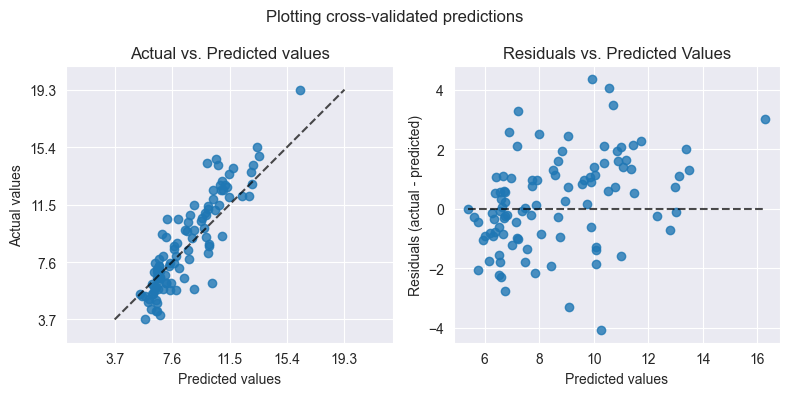

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_pred = ensemble.predict(X=X_train)
print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();